# Business Problem

The objective of the case study is to analyze customer reviews and predict customer satisfaction with the reviews.

### Import necessary packages

In [1]:
import numpy as np
import pandas as pd

#for plots and charts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#python -m nltk.downloader all

In [3]:
#nltk.download()

In [4]:
#for text preprocessing(nlp)
import string
import nltk

#nltk.download()

In [5]:
#for tokenization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Data Import

In [6]:
reviews = pd.read_excel('BankReviews.xlsx')

In [7]:
reviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


### Data Audit

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [9]:
reviews.shape

(505, 4)

In [10]:
#changing the column names to lower-case
reviews.columns = reviews.columns.str.lower()

In [11]:
reviews.stars.value_counts()

5    410
1     95
Name: stars, dtype: int64

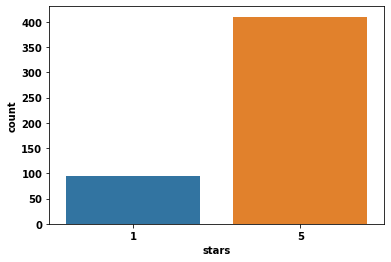

In [12]:
sns.countplot(reviews.stars)
plt.show()

Above plot shows that the 5 start ratings are more in number

### Data Processing

In [13]:
reviews['reviews'] = reviews['reviews'].astype('str')

In [14]:
#UDF to do basic cleaning of data
def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    text = ''.join(c for c in text if c not in string.punctuation)   #remove punctautions from reviews
    return text

In [15]:
reviews.reviews.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: reviews, dtype: object

In [16]:
reviews.reviews = reviews['reviews'].apply(lambda x : clean_data(x))

In [17]:
reviews.reviews.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: reviews, dtype: object

In [18]:
#remove stop words from reviews
stop = set(nltk.corpus.stopwords.words('english'))
print(stop)

{"needn't", 'more', 'wouldn', "aren't", 'for', 'against', 'can', 'just', 'doesn', 'theirs', 'who', 'yours', 'own', "don't", 'hasn', 'their', 'ours', 'himself', 'aren', "she's", 'down', 'of', 'before', 'i', "didn't", 'with', 'how', 'at', 'be', 'off', "won't", 'am', 'was', 'weren', 'because', 'she', 'what', 'below', 've', "weren't", 'her', 'while', "you're", 'very', 'on', 'shan', 's', 'once', 'd', 'until', 'hers', 'so', 'ain', 'my', 'are', "hasn't", 'm', 'didn', 'me', 'have', 'had', 'and', 'or', 'they', 'each', 'through', 'o', 'myself', 'yourself', 'such', 'few', "you'd", 'isn', 'it', "mightn't", 'needn', 'you', 'itself', 'up', 'mustn', 't', "shan't", 'these', 'now', "couldn't", 'should', 'whom', 'ourselves', 'your', 'if', 'some', "should've", 'than', 'too', 'as', 'did', 'other', 'don', 'shouldn', 'in', 'those', 'but', 'all', 'same', "shouldn't", "mustn't", 'why', 'between', 'again', "you'll", 'this', 'we', 'he', 'y', 'themselves', "wasn't", 'hadn', "hadn't", 'yourselves', 'were', 'herse

In [19]:
reviews.reviews = reviews.reviews.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [20]:
reviews.reviews.head()

0    great job wyndham capital person professional ...
1    matthew richardson professional helpful helped...
2    past experience wyndham mortgage would without...
3    dealing brad thomka beginning started stressfu...
4    cant express grateful support zach provided fa...
Name: reviews, dtype: object

### Classification of reviews into positive, negative and neutral

In [21]:
from textblob import TextBlob

In [22]:
x = reviews['reviews']
y = reviews['stars']

In [23]:
x.head()

0    great job wyndham capital person professional ...
1    matthew richardson professional helpful helped...
2    past experience wyndham mortgage would without...
3    dealing brad thomka beginning started stressfu...
4    cant express grateful support zach provided fa...
Name: reviews, dtype: object

In [24]:
def get_review_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity>0:
        return 'Positive'
    elif polarity<0:
        return 'Negative'
    else:
        return 'Neutral'

In [25]:
final_reviews = []

for text in x:
    review_dict = {}
    review_dict['text'] = text
    review_dict['sentiment'] = get_review_sentiment(text)
    final_reviews.append(review_dict)
print(final_reviews[:5])

[{'text': 'great job wyndham capital person professional helped us move refinance process smoothly thank', 'sentiment': 'Positive'}, {'text': 'matthew richardson professional helpful helped us find correct product mortgage thank much excellent service matthew', 'sentiment': 'Positive'}, {'text': 'past experience wyndham mortgage would without question use needed wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option us ultimately saved us money would highly recommend brad thomka wyndham capital mortgage team mortgage needs sincerest thanks wyndham ed lind', 'sentiment': 'Negative'}, {'text': 'dealing brad thomka beginning started stressful time us help brad entire wyndham mortgage team turned happy ending brad wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option us ultimately saved us money indebted would highly recommend brad thomka wyndham capital mo

In [26]:
# counting number of positive,neutral and negative review
posreviews = [review for review in final_reviews if review['sentiment'] == 'Positive']
negreviews = [review for review in final_reviews if review['sentiment'] == 'Negative']
neutralreviews = [review for review in final_reviews if review['sentiment'] == 'Neutral']
posreviews[:5]

[{'text': 'great job wyndham capital person professional helped us move refinance process smoothly thank',
  'sentiment': 'Positive'},
 {'text': 'matthew richardson professional helpful helped us find correct product mortgage thank much excellent service matthew',
  'sentiment': 'Positive'},
 {'text': 'dealing brad thomka beginning started stressful time us help brad entire wyndham mortgage team turned happy ending brad wyndham went beyond extra mile right wrong encountered servicer dealing previous loan pulled together found viable option us ultimately saved us money indebted would highly recommend brad thomka wyndham capital mortgage team mortgage needs sincerest thanks wyndham ed lindread less',
  'sentiment': 'Positive'},
 {'text': 'cant express grateful support zach provided family home purchase customer service responsiveness professional demeanor second none thorough took time educate process along way highly recommend working zach wyndham capital',
  'sentiment': 'Positive'},
 

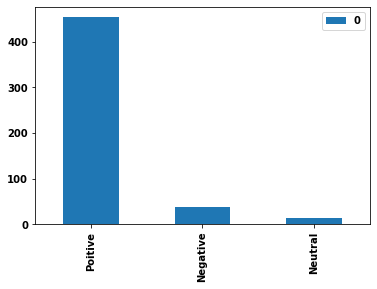

In [27]:
#plotting the proportion of positive, negative and neutral reviews
df_count = pd.DataFrame([len(posreviews), len(negreviews), len(neutralreviews)], index=['Poitive', 'Negative', 'Neutral'])

df_count.plot(kind = 'bar')
plt.show()

### Finding most frequently used Positive/ Negative words

In [28]:
#Tokenization(Using count vectorizer as we have to find the highest count of positive/negative words)
count_vect = CountVectorizer(ngram_range=(1,1), stop_words='english')
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [29]:
#fitting the data
token = count_vect.fit_transform(x)

In [30]:
#sparse matrix
print(token)

  (0, 2248)	1
  (0, 2086)	1
  (0, 1721)	1
  (0, 1851)	1
  (0, 1077)	1
  (0, 1733)	1
  (0, 1643)	1
  (0, 365)	1
  (0, 2487)	1
  (0, 1240)	1
  (0, 1019)	1
  (1, 2031)	1
  (1, 817)	1
  (1, 1481)	1
  (1, 1730)	1
  (1, 557)	1
  (1, 1078)	1
  (1, 1939)	1
  (1, 1417)	2
  (1, 2248)	1
  (1, 1077)	1
  (1, 1733)	1
  (2, 1335)	1
  (2, 745)	1
  (2, 2251)	1
  :	:
  (504, 355)	1
  (504, 444)	1
  (504, 2137)	3
  (504, 1496)	2
  (504, 803)	2
  (504, 864)	2
  (504, 1005)	2
  (504, 671)	1
  (504, 2018)	1
  (504, 1333)	1
  (504, 251)	1
  (504, 1795)	1
  (504, 1966)	2
  (504, 1276)	1
  (504, 2490)	1
  (504, 2284)	1
  (504, 1302)	1
  (504, 458)	1
  (504, 438)	4
  (504, 542)	1
  (504, 2471)	1
  (504, 2273)	1
  (504, 270)	2
  (504, 1353)	4
  (504, 853)	1


In [31]:
token.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
count_vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2005',
 '2011',
 '2017',
 '2018',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquire',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addedconsolidationit',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'a

In [33]:
print('Total number of tokens/words in all the reviews - ', len(count_vect.get_feature_names()))

Total number of tokens/words in all the reviews -  2499


In [34]:
temp_df = pd.DataFrame(token.toarray(), columns=[count_vect.get_feature_names()])

In [35]:
temp_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,...,xx,year,years,yelp,yep,yes,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [36]:
#count the number of times a word appear in entire corpus
count_res = temp_df.apply(lambda x : x.sum())
count_df = pd.DataFrame(count_res).reset_index()

In [37]:
count_df.columns = ['Word', 'Count']

In [38]:
count_df

,Word,Count
0,10,10
1,100,9
2,101,1
3,1014,1
4,1031,2
5,1040s,1
6,11,6
7,12,6
8,13,4
9,15,5


In [39]:
def get_sentiment_token(word):
    pol = TextBlob(word).sentiment.polarity
    if pol > 0:
        return 'Positive'
    elif pol < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [40]:
count_df['Sentiment'] = count_df.apply(lambda df : get_sentiment_token(df['Word']), axis = 1)

In [41]:
count_df

,Word,Count,Sentiment
0,10,10,Neutral
1,100,9,Neutral
2,101,1,Neutral
3,1014,1,Neutral
4,1031,2,Neutral
5,1040s,1,Neutral
6,11,6,Neutral
7,12,6,Neutral
8,13,4,Neutral
9,15,5,Neutral


In [42]:
#filtering out positive and negative words
positive_words = count_df[count_df.Sentiment == 'Positive']
negative_words = count_df[count_df.Sentiment == 'Negative']

In [43]:
freq_positive = positive_words.sort_values(by='Count', ascending= False)
freq_negative = negative_words.sort_values(by='Count', ascending= False)

In [44]:
freq_positive[:10]

,Word,Count,Sentiment
1019,great,139,Positive
278,best,99,Positive
1733,professional,70,Positive
743,easy,65,Positive
1091,highly,64,Positive
2251,thanks,61,Positive
2201,sure,51,Positive
64,able,47,Positive
1005,good,39,Positive
1053,happy,37,Positive


In [45]:
# Simple WordCloud
from os import path
from scipy.misc import imread
import random

from wordcloud import WordCloud, STOPWORDS      #need to install wordcloud package

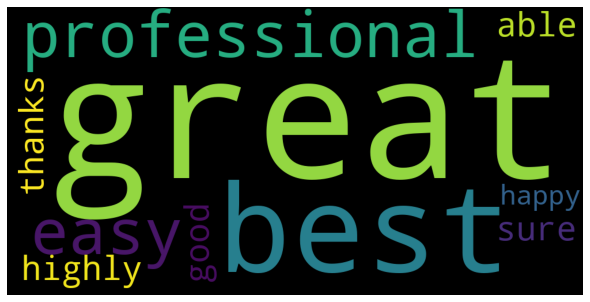

In [46]:
# plot the WordCloud image      
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(freq_positive[:10].Word))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [47]:
freq_negative[:10]

,Word,Count,Sentiment
436,closed,68,Negative
855,extremely,46,Negative
1056,hard,40,Negative
1680,poor,32,Negative
489,complicated,18,Negative
1347,little,15,Negative
1709,previous,13,Negative
1613,past,13,Negative
826,expected,11,Negative
2121,spent,11,Negative


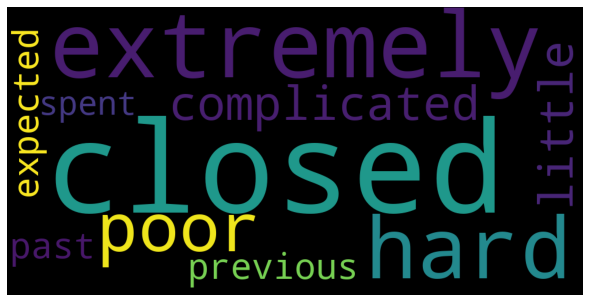

In [48]:
# plot the WordCloud image      
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(freq_negative[:10].Word))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Identify Key theme problems 

Here we can use Topic modelling first on entire corpus and then on different clusters

### Clustering

In [49]:
#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_tdm = tfidf_vect.fit_transform(x)
print(x_tdm)

  (0, 1019)	0.1965777468861076
  (0, 1240)	0.32520231027729396
  (0, 2487)	0.39978658986182497
  (0, 365)	0.3769183660158759
  (0, 1643)	0.3591803935459761
  (0, 1733)	0.23672840438121417
  (0, 1077)	0.28958823966125624
  (0, 1851)	0.24898204334540736
  (0, 1721)	0.1561087228332439
  (0, 2086)	0.3591803935459761
  (0, 2248)	0.2634750221298428
  (1, 1733)	0.16361200928310454
  (1, 1077)	0.20014545309669335
  (1, 2248)	0.1820976146874028
  (1, 1417)	0.673329800907363
  (1, 1939)	0.3589409374574018
  (1, 1078)	0.17686132419114142
  (1, 557)	0.3589409374574018
  (1, 1730)	0.26528298557614094
  (1, 1481)	0.13978827930855048
  (1, 817)	0.21202463547024578
  (1, 2031)	0.15103957522287303
  (2, 2487)	0.5875857183865076
  (2, 365)	0.13849379549289823
  (2, 1481)	0.2229514104910101
  :	:
  (504, 170)	0.09363267986477143
  (504, 2291)	0.2737949607704633
  (504, 200)	0.1450794775509509
  (504, 1806)	0.03519301612814193
  (504, 1821)	0.0840755398913281
  (504, 528)	0.2987963687570928
  (504, 48)	0.

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [51]:
# we create a kmeans model
model = KMeans(n_clusters=3, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)
kmeans = model.fit(x_tdm)

In [52]:
vocab = np.array(tfidf_vect.get_feature_names())
vocab

array(['10', '100', '101', ..., 'zach', 'zelada', 'zero'], dtype='<U20')

In [53]:
cluster_centers = np.array(kmeans.cluster_centers_)
cluster_centers[0].argsort()

array([1249, 1306, 1305, ..., 2273, 1353, 1078], dtype=int64)

In [54]:
# sorting the cluster centers
sorted_vals = [kmeans.cluster_centers_[i].argsort() for i in range(0,np.shape(kmeans.cluster_centers_)[0])]

In [55]:
# get top 10 words from that cluster
words=set()
for i in range(len(kmeans.cluster_centers_)):
    words = set(vocab[sorted_vals[i][-10:]])
    print(words)

{'closing', 'able', 'weeks', 'time', 'rate', 'team', 'closed', 'helpful', 'loan', 'home'}
{'recommend', 'mortgage', 'process', 'best', 'alex', 'service', 'company', 'loan', 'customer', 'lender'}
{'recommend', 'questions', 'great', 'team', 'process', 'easy', 'highly', 'home', 'work', 'responsive'}


In [56]:
reviews['cluster'] =  model.labels_
reviews.head()

,date,stars,reviews,bankname,cluster
0,2017-04-10,5,great job wyndham capital person professional ...,Wyndham Capital Mortgage,2
1,2017-02-10,5,matthew richardson professional helpful helped...,Wyndham Capital Mortgage,1
2,2017-08-21,5,past experience wyndham mortgage would without...,Wyndham Capital Mortgage,1
3,2017-12-17,5,dealing brad thomka beginning started stressfu...,Wyndham Capital Mortgage,1
4,2016-05-27,5,cant express grateful support zach provided fa...,Wyndham Capital Mortgage,1


In [57]:
reviews.groupby('cluster').mean()

,stars
cluster,
0,4.125828
1,3.722513
2,4.975460


### Topic Modelling on each cluster

In [58]:
from sklearn import decomposition

In [59]:
x_cluster_0 = reviews[reviews.cluster == 0].reviews
x_cluster_1 = reviews[reviews.cluster == 1].reviews
x_cluster_2 = reviews[reviews.cluster == 2].reviews

In [60]:
#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_0_tdm = tfidf_vect.fit_transform(x_cluster_0)
vocab_0 = tfidf_vect.get_feature_names()

#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_1_tdm = tfidf_vect.fit_transform(x_cluster_1)
vocab_1 = tfidf_vect.get_feature_names()

#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_2_tdm = tfidf_vect.fit_transform(x_cluster_2)
vocab_2 = tfidf_vect.get_feature_names()



In [61]:
tdm_list = [x_0_tdm, x_1_tdm, x_2_tdm]

In [62]:

final_topics = []
#now iterate the LDA model for each cluster separately
for i, dist_tdm in enumerate(tdm_list):
    lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=100)
    lda_model.fit_transform(dist_tdm)
    dict_topics = {}
    dict_topics['cluster'] = i
    dict_topics['topic_word'] = lda_model.components_
    final_topics.append(dict_topics)

In [63]:
final_topics

[{'cluster': 0,
  'topic_word': array([[0.10080797, 0.10012827, 0.10003646, ..., 0.10003301, 0.10003618,
          0.17866424],
         [0.10004065, 0.10003329, 0.10002915, ..., 0.10003537, 0.1000393 ,
          0.10003888],
         [0.10002878, 0.10011799, 0.10003048, ..., 0.17520885, 0.17674014,
          0.10003688],
         ...,
         [0.10002978, 0.10007434, 0.10004151, ..., 0.10003764, 0.10023142,
          0.10003182],
         [0.10003064, 0.10003118, 0.29910927, ..., 0.10003426, 0.10003397,
          0.10003927],
         [0.1000306 , 0.10052717, 0.10003201, ..., 0.10003583, 0.10003102,
          0.10003203]])},
 {'cluster': 1,
  'topic_word': array([[0.10003461, 0.10002901, 0.10003206, ..., 0.10003544, 0.10003068,
          0.25176986],
         [0.10002987, 0.10002667, 0.10003711, ..., 0.10003052, 0.10002861,
          0.10003415],
         [0.10003625, 0.47752193, 0.10003666, ..., 0.47761013, 0.10002829,
          0.10010893],
         ...,
         [0.10003211, 0.260

In [64]:
np.array(vocab_0)

array(['10', '100', '101', ..., 'yep', 'yes', 'youi'], dtype='<U20')

In [65]:
final_topics[0]['topic_word']

array([[0.10080797, 0.10012827, 0.10003646, ..., 0.10003301, 0.10003618,
        0.17866424],
       [0.10004065, 0.10003329, 0.10002915, ..., 0.10003537, 0.1000393 ,
        0.10003888],
       [0.10002878, 0.10011799, 0.10003048, ..., 0.17520885, 0.17674014,
        0.10003688],
       ...,
       [0.10002978, 0.10007434, 0.10004151, ..., 0.10003764, 0.10023142,
        0.10003182],
       [0.10003064, 0.10003118, 0.29910927, ..., 0.10003426, 0.10003397,
        0.10003927],
       [0.1000306 , 0.10052717, 0.10003201, ..., 0.10003583, 0.10003102,
        0.10003203]])

In [66]:
# view the topic models for cluster 0
n_top_words = 10
topic_summaries_cluster0 = []
for i, topic_dist in enumerate(final_topics[0]['topic_word']):
    topic_words = np.array(vocab_0)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries_cluster0.append(' '.join(topic_words))

topic_summaries_cluster0

['closing nasb total consultant good rep estimate state faith cost',
 'barrett mr beginning jon ll certainly end buy pleasure tim',
 'aaron close rc looking date rate able stayed projected malcolm',
 'everythign target stayed rc sure make excellent looking closed service',
 'chaz property challenges consummate share glue spirits staying opportunities chase',
 'helpful time bank quick best completed loan closing fast service',
 'timely appreciated responses joey manner dollars weeks time home loan',
 'time kory va felt make nasb closing loan decision financial',
 'helpful hartegan chose joey pleased wife officer refinance friendly nasb',
 'aspects necessary congratulations hand sending note written brought touch skills']

In [67]:
# view the topic models for cluster 0
n_top_words = 10
topic_summaries_cluster1 = []
for i, topic_dist in enumerate(final_topics[1]['topic_word']):
    topic_words = np.array(vocab_1)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries_cluster1.append(' '.join(topic_words))

topic_summaries_cluster1

['mike said emailedand unfortunately andrew email brokers review clients thank',
 'great jon mortgage ve loan company jeremy business quick process',
 'anthony germain mr process kory provided marroquin dlj home complicated',
 'penny low sam know costs works closing mortgage truly ahead',
 'response possible pleasure lender nick best better ask exceeded kirk',
 'oriented madewell professional customer offer tree alex lending looking nasb',
 'rate apr disturbing registering unprofessional site fees list higher number',
 'service timely time outstanding team respectful adam close customer working',
 'poor home recommend experience alex loan steve definitely brent process',
 'dean went bryant loan industry payments use knowledge scott letter']

In [68]:
# view the topic models for cluster 2
n_top_words = 10
topic_summaries_cluster2 = []
for i, topic_dist in enumerate(final_topics[2]['topic_word']):
    topic_words = np.array(vocab_2)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries_cluster2.append(' '.join(topic_words))

topic_summaries_cluster2

['marcus deff efficient respond future use quick recommend great technology',
 'aaron possible needs helping friendly wife mile veteran kept extra',
 'hard went make fred like jon approved really stressful feel',
 'great process highly service recommend easy time team questions rate',
 'fred amazing helped home work officer best process great way',
 'people mary thoroughness teams constant updates appreciated entire uncomfortable management',
 'speed loan adam work refi awesome fred barrett staff methods',
 'steve bank got great supervisor glad easily friend 30 products',
 'bryant person deal got best working price matched honest chris',
 'jon easy work responsive great answers good got surprises house']

### Predicting start rating using reviews

In [70]:
reviews['sentiment'] = reviews["reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [71]:
reviews.head()

,date,stars,reviews,bankname,cluster,sentiment
0,2017-04-10,5,great job wyndham capital person professional ...,Wyndham Capital Mortgage,2,0.433333
1,2017-02-10,5,matthew richardson professional helpful helped...,Wyndham Capital Mortgage,1,0.550000
2,2017-08-21,5,past experience wyndham mortgage would without...,Wyndham Capital Mortgage,1,-0.033869
3,2017-12-17,5,dealing brad thomka beginning started stressfu...,Wyndham Capital Mortgage,1,0.061238
4,2016-05-27,5,cant express grateful support zach provided fa...,Wyndham Capital Mortgage,1,0.086667


In [76]:
reviews['stars'].value_counts()

5    410
1     95
Name: stars, dtype: int64

In [79]:
X = reviews['reviews']
Y = reviews['stars']

In [83]:
#split data into train & tet dataset
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 333)
print(train_x.shape)
print(test_x.shape)

(378,)
(127,)


#### Tokenization using count, tfidf, tfidf_ngrams

In [85]:
#dtm with unigram
count_vect = CountVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df = 5, max_features=1000)
train_x_count = count_vect.fit_transform(train_x)
#print(train_x_count)
#transform test dataset
test_x_count = count_vect.transform(test_x)

#tf-idf with unigram
tfidf_vect = TfidfVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df = 5, max_features=1000)
train_x_tfidf = tfidf_vect.fit_transform(train_x)
#transform test dataset
test_x_tfidf = tfidf_vect.transform(test_x)

#tf-idf with ngram
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words='english', min_df = 5, max_features=1000)
train_x_tfidf_ngram = tfidf_vect_ngram.fit_transform(train_x)
#transform test dataset
test_x_tfidf_ngram = tfidf_vect_ngram.transform(test_x)

#### Proportion of both classes

In [77]:
unique_elements, counts_elements = np.unique(train_y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  1   5]
 [ 77 301]]


In [116]:
CountVectorizer?

The classes are not balanced. Hence we have to **oversample** the train dataset.

In [87]:
from imblearn.over_sampling import RandomOverSampler

In [91]:
ros = RandomOverSampler(random_state=123)
train_x_count_os , train_y_count_os = ros.fit_sample(train_x_count, train_y)
train_x_tfidf_os , train_y_tfidf_os = ros.fit_sample(train_x_tfidf, train_y)
train_x_tfidf_ngram_os , train_y_tfidf_ngram_os = ros.fit_sample(train_x_tfidf_ngram, train_y)

unique_elements, counts_elements = np.unique(train_y_tfidf_ngram_os, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  1   5]
 [301 301]]


### Naive Bayes application

In [92]:
from sklearn import naive_bayes

In [102]:
def model_train(classifier, train_feature, label, test_valid, label_test):
    classifier.fit(train_feature, label)
    predicted_label = classifier.predict(test_valid)
    print(metrics.confusion_matrix(label_test,predicted_label,[5,1]))
    return metrics.accuracy_score(classifier.predict(train_feature), label), metrics.accuracy_score(predicted_label, label_test)

In [103]:
acc_m1 = model_train(naive_bayes.MultinomialNB(), train_x_count_os, train_y_count_os, test_x_count, test_y)
print('Accuracy score for DTM ', acc_m1)

acc_m2 = model_train(naive_bayes.MultinomialNB(), train_x_tfidf_os, train_y_tfidf_os, test_x_tfidf, test_y)
print('Accuracy score for TFIDF ', acc_m2)

acc_m3 = model_train(naive_bayes.MultinomialNB(), train_x_tfidf_ngram_os, train_y_tfidf_ngram_os, test_x_tfidf_ngram, test_y)
print('Accuracy score for TFIDF ngram ', acc_m3)


[[106   3]
 [  2  16]]
Accuracy score for DTM  (0.9700996677740864, 0.9606299212598425)
[[105   4]
 [  0  18]]
Accuracy score for TFIDF  (0.9883720930232558, 0.968503937007874)
[[106   3]
 [  0  18]]
Accuracy score for TFIDF ngram  (0.9850498338870431, 0.9763779527559056)


As we can observe from above that TFIDF with ngram shows the highest accuracy. Hence we will go forward with third model.

In [105]:
model = naive_bayes.MultinomialNB().fit(train_x_tfidf_ngram_os, train_y_tfidf_ngram_os)

### Model Validation

In [101]:
from sklearn.metrics import classification_report

In [108]:
predicted_label = model.predict(test_x_tfidf_ngram)
cm = metrics.confusion_matrix(test_y,predicted_label,[5,1])
cm

array([[106,   3],
       [  0,  18]], dtype=int64)

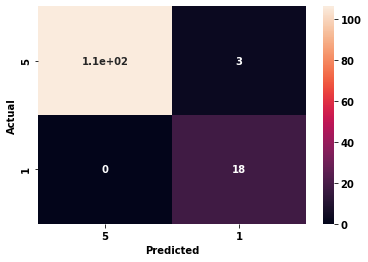

In [113]:
sns.heatmap(cm, xticklabels=[5,1], yticklabels=[5,1], annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [115]:
print(metrics.roc_auc_score(predicted_label, test_y))
print(metrics.accuracy_score(predicted_label, test_y))

0.9285714285714286
0.9763779527559056


In [70]:

import pandas as pd
from nltk.tokenize import word_tokenize
post = ['ameria investment consulting company job title','international research  exchanges board irex',
         'title research  consulting board irex', 'ameria title  exchanges']
year = ['2018','2019','2019', '2020']
df = pd.concat([pd.Series(post), pd.Series(year)], axis =1)
df.columns = ['post', 'year']
for b in post:
    print(word_tokenize(b))
    
topics =['consulting', 'ameria', 'irex']
df

['ameria', 'investment', 'consulting', 'company', 'job', 'title']
['international', 'research', 'exchanges', 'board', 'irex']
['title', 'research', 'consulting', 'board', 'irex']
['ameria', 'title', 'exchanges']


,post,year
0,ameria investment consulting company job title,2018
1,international research exchanges board irex,2019
2,title research consulting board irex,2019
3,ameria title exchanges,2020


In [71]:
pd.Series(post)

0    ameria investment consulting company job title
1      international research  exchanges board irex
2             title research  consulting board irex
3                           ameria title  exchanges
dtype: object

In [75]:
for a in df[df.year == '2019'].post:
     for w in word_tokenize(a):
        print(w)

international
research
exchanges
board
irex
title
research
consulting
board
irex


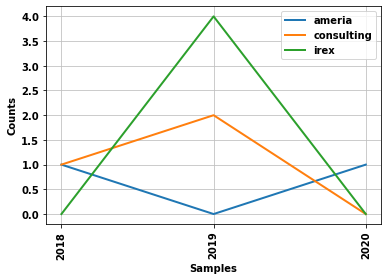

In [73]:
#use lexical dispersion plot to see the topics use over time
#Start pylab inline mode, so figures will appear in the notebook

import nltk

#conditional frequency distribution plot to see the use of topics over time
cfd = nltk.ConditionalFreqDist(
    (target, year)
    for year in df.year
    for a in df[df.year == year].post
    for w in word_tokenize(a)
    for target in topics
    if w.startswith(target))
cfd.plot()

#    for w in jobpost_df_1.words(year)

In [74]:
df

,post,year
0,ameria investment consulting company job title,2018
1,international research exchanges board irex,2019
2,title research consulting board irex,2019
3,ameria title exchanges,2020
